In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('fifa_eda.csv')
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


### Data Cleaning

In [3]:
data.shape
#The data consists of 18207 samples/rows and 18 features/columns

(18207, 18)

In [4]:
data.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [5]:
nan_columns=[]
for column in data.columns:
    if(data[column].isna().sum()>0):
        nan_columns.append(column)
print(nan_columns)

['Club', 'Value', 'International Reputation', 'Skill Moves', 'Contract Valid Until']


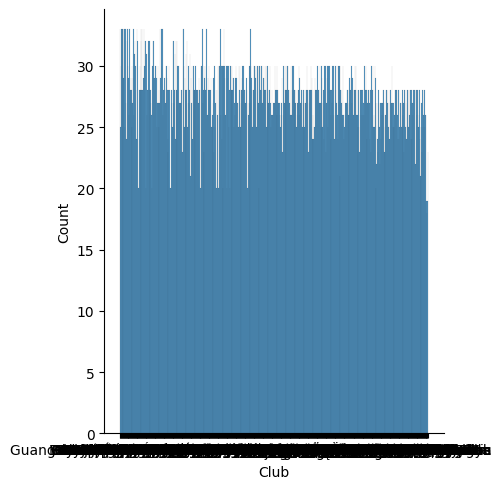

<Figure size 640x480 with 0 Axes>

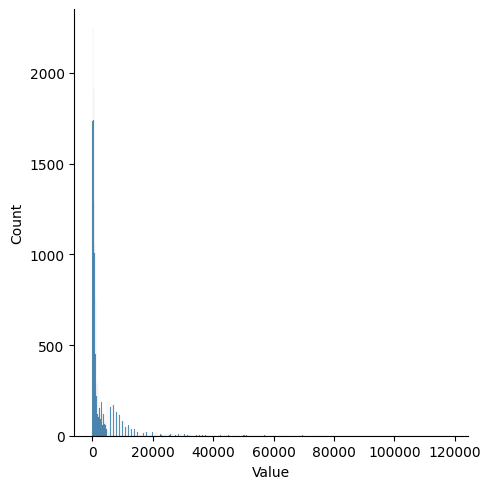

<Figure size 640x480 with 0 Axes>

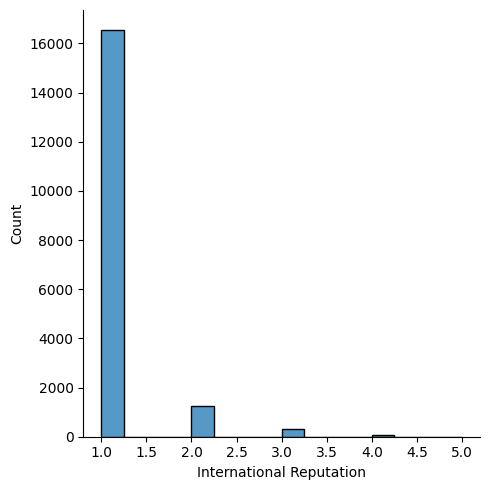

<Figure size 640x480 with 0 Axes>

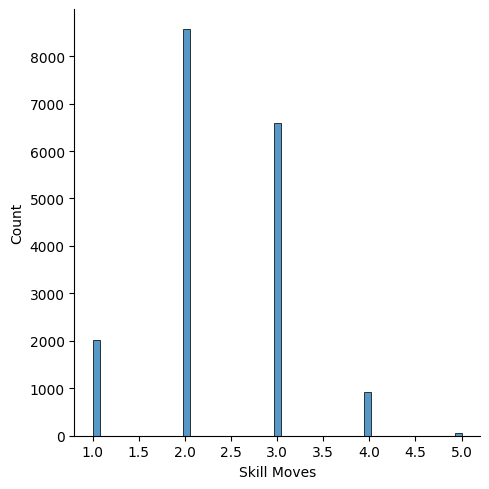

<Figure size 640x480 with 0 Axes>

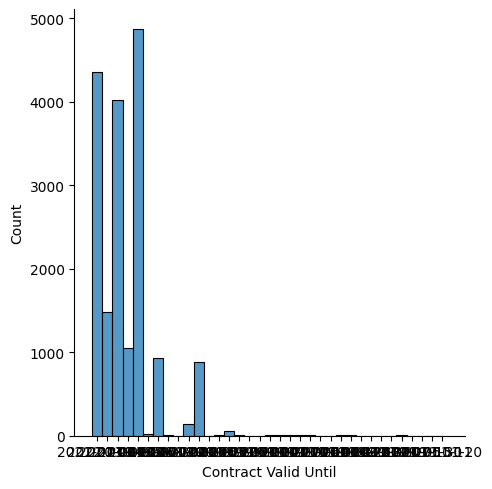

<Figure size 640x480 with 0 Axes>

In [6]:
for column in nan_columns:
    sns.displot(data[column])
    plt.figure()